In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Star_Dataset.csv')

In [3]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [4]:
unique_values = df['Star color'].unique()

print(unique_values)

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']


In [5]:
value_mapping = {'Blue White': 'Blue White', 'Whitish': 'White', 'Blue white':'Blue White','Blue-white': 'Blue White','Whitish':'White','Yellowish White':'Yellow White', 'yellow-white': 'Yellow White','White-Yellow':'Yellow White','white':'White', 'Blue ':'Blue', 'yellowish':'Yellow', 'Yellowish':'Yellow','Blue white ':'Blue White', 'Blue-White':'Blue White','Orange-Red':'Orange Red'  }
df['Star color'].replace(value_mapping, inplace=True)

In [6]:
x = df['Star type'].value_counts()

In [7]:
x

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

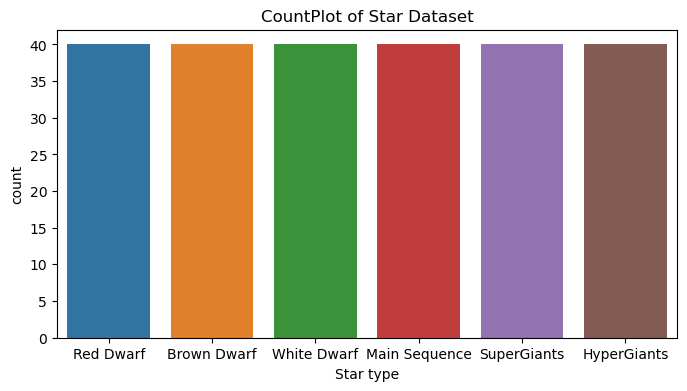

In [97]:
plt.figure(figsize=(8,4))  
sns.countplot(x="Star type", data=df)
plt.title('CountPlot of Star Dataset')
plt.xticks(ticks = [0,1,2,3,4,5], labels = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence' , 'SuperGiants', 'HyperGiants'])
plt.savefig('1.png')
plt.show()


In [9]:
star_type_by_color = df.groupby('Star color')['Star type'].mean()

In [10]:
star_type_by_color

Star color
Blue                  3.571429
Blue White            2.951220
Orange                5.000000
Orange Red            3.000000
Pale yellow orange    2.000000
Red                   1.705357
White                 2.666667
Yellow                3.000000
Yellow White          2.666667
Name: Star type, dtype: float64

In [11]:
df.groupby(['Star color','Star type']).size()

Star color          Star type
Blue                2            13
                    3             5
                    4            31
                    5             7
Blue White          2            14
                    3            21
                    5             6
Orange              5             2
Orange Red          3             1
Pale yellow orange  2             1
Red                 0            40
                    1            40
                    4             9
                    5            23
White               2             8
                    3             2
                    5             2
Yellow              3             3
Yellow White        2             4
                    3             8
dtype: int64

In [12]:
table = pd.pivot_table(df,values ='Star type',index =['Star color'], columns = ['Spectral Class'] )

In [13]:
table

Spectral Class,A,B,F,G,K,M,O
Star color,,,,,,,
Blue,NaN,2.437500,NaN,NaN,NaN,NaN,4.025
Blue White,2.75,3.034483,NaN,NaN,NaN,NaN,NaN
Orange,NaN,NaN,NaN,NaN,5.0,5.000000,NaN
Orange Red,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Pale yellow orange,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
Red,NaN,NaN,NaN,5.0,5.0,1.645455,NaN
White,3.00,3.000000,2.000000,NaN,NaN,NaN,NaN
Yellow,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Yellow White,NaN,NaN,2.666667,NaN,NaN,NaN,NaN


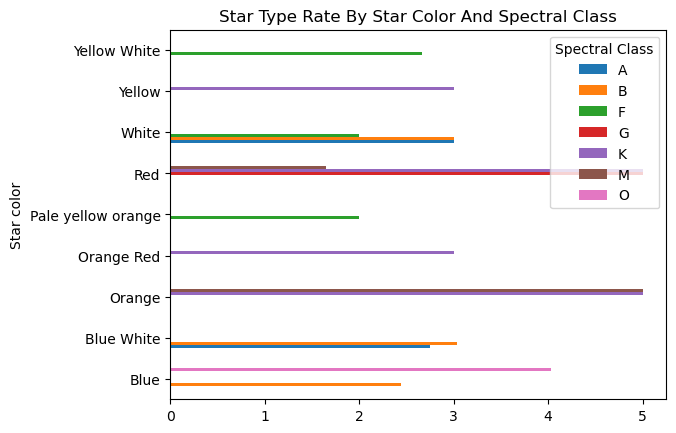

In [99]:
table.plot.barh()
plt.savefig('2.png')
plt.title('Star Type Rate By Star Color And Spectral Class')
plt.show()

In [100]:
star_type_by_specclass = df.groupby('Spectral Class')['Star type'].mean()

In [101]:
star_type_by_specclass

Spectral Class
A    2.842105
B    2.826087
F    2.470588
G    5.000000
K    3.666667
M    1.675676
O    4.025000
Name: Star type, dtype: float64

In [102]:
df.groupby(['Spectral Class','Star type']).size()

Spectral Class  Star type
A               2             7
                3            10
                5             2
B               2            24
                3            13
                4             2
                5             7
F               2             9
                3             8
G               5             1
K               3             4
                5             2
M               0            40
                1            40
                4             9
                5            22
O               3             5
                4            29
                5             6
dtype: int64

In [103]:
df['Temperature (K)'].max() 

40000

In [104]:
df['Temperature (K)'].min()

1939

In [105]:
df['Temperature Range'] = pd.cut(df['Temperature (K)'], bins=[0, 8000, 16000, 24000 , 32000, 40000], labels=['0 - 8000', '8001-16000','16001-24000', '24001-32000', '32001-40000'])

In [106]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Temperature Range
0,3068,0.002400,0.1700,16.12,0,Red,M,0 - 8000
1,3042,0.000500,0.1542,16.60,0,Red,M,0 - 8000
2,2600,0.000300,0.1020,18.70,0,Red,M,0 - 8000
3,2800,0.000200,0.1600,16.65,0,Red,M,0 - 8000
4,1939,0.000138,0.1030,20.06,0,Red,M,0 - 8000
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O,32001-40000
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O,24001-32000
237,8829,537493.000000,1423.0000,-10.73,5,White,A,8001-16000
238,9235,404940.000000,1112.0000,-11.23,5,White,A,8001-16000


In [107]:
newtable = pd.pivot_table(df,values ='Star type',index =['Star color', 'Temperature Range'], columns = ['Spectral Class'] )

In [108]:
newtable

Spectral Class                           A         B         F    G    K  \
Star color         Temperature Range                                       
Blue               0 - 8000            NaN       NaN       NaN  NaN  NaN   
                   8001-16000          NaN  2.000000       NaN  NaN  NaN   
                   16001-24000         NaN  2.000000       NaN  NaN  NaN   
                   24001-32000         NaN  3.500000       NaN  NaN  NaN   
                   32001-40000         NaN  4.000000       NaN  NaN  NaN   
Blue White         8001-16000         2.75  2.636364       NaN  NaN  NaN   
                   16001-24000         NaN  3.000000       NaN  NaN  NaN   
                   24001-32000         NaN  3.555556       NaN  NaN  NaN   
Orange             0 - 8000            NaN       NaN       NaN  NaN  5.0   
Orange Red         0 - 8000            NaN       NaN       NaN  NaN  3.0   
Pale yellow orange 0 - 8000            NaN       NaN  2.000000  NaN  NaN   
Red                0 - 8000            NaN       NaN       NaN  5.0  5.0   
White              0 - 8000           2.00       NaN  2.000000  NaN  NaN   
                   8001-16000         3.40  3.000000  2.000000  NaN  NaN   
Yellow             0 - 8000            NaN       NaN       NaN  NaN  3.0   
Yellow White       0 - 8000            NaN       NaN  2.777778  NaN  NaN   
                   8001-16000          NaN       NaN  2.333333  NaN  NaN   

Spectral Class                               M         O  
Star color         Temperature Range                      
Blue               0 - 8000                NaN  4.000000  
                   8001-16000              NaN  4.000000  
                   16001-24000             NaN  4.090909  
                   24001-32000             NaN  4.200000  
                   32001-40000             NaN  3.909091  
Blue White         8001-16000              NaN       NaN  
                   16001-24000             NaN       NaN  
                   24001-32000             NaN       NaN  
Orange             0 - 8000           5.000000       NaN  
Orange Red         0 - 8000                NaN       NaN  
Pale yellow orange 0 - 8000                NaN       NaN  
Red                0 - 8000           1.645455       NaN  
White              0 - 8000                NaN       NaN  
                   8001-16000              NaN       NaN  
Yellow             0 - 8000                NaN       NaN  
Yellow White       0 - 8000                NaN       NaN  
                   8001-16000              NaN       NaN

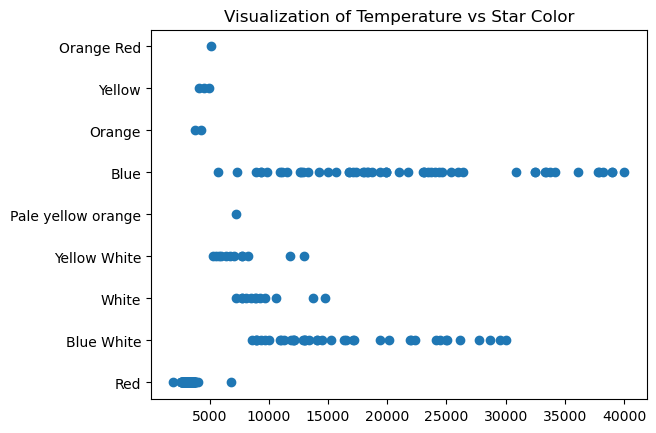

In [109]:
plt.scatter(df['Temperature (K)'], df['Star color'])
plt.title('Visualization of Temperature vs Star Color')
plt.savefig('3.png')


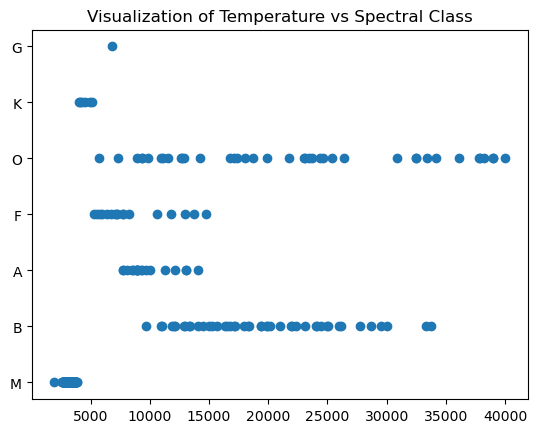

In [110]:
plt.scatter(df['Temperature (K)'], df['Spectral Class'])
plt.title('Visualization of Temperature vs Spectral Class')
plt.savefig('4.png')

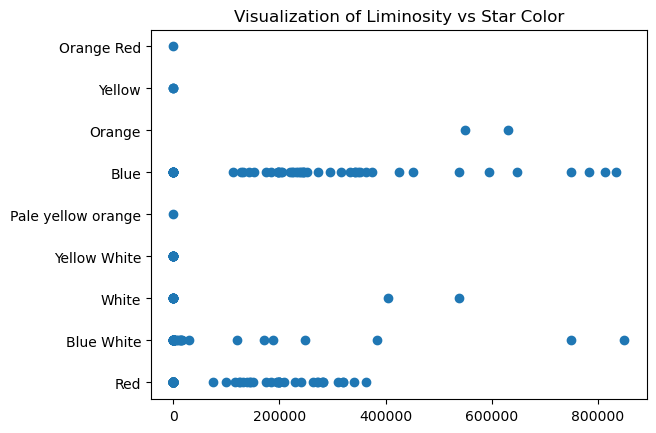

In [111]:
plt.scatter(df['Luminosity(L/Lo)'], df['Star color'])
plt.title('Visualization of Liminosity vs Star Color')
plt.savefig('5.png')

In [112]:
nf = df.copy()


In [113]:
nf

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Temperature Range
0,3068,0.002400,0.1700,16.12,0,Red,M,0 - 8000
1,3042,0.000500,0.1542,16.60,0,Red,M,0 - 8000
2,2600,0.000300,0.1020,18.70,0,Red,M,0 - 8000
3,2800,0.000200,0.1600,16.65,0,Red,M,0 - 8000
4,1939,0.000138,0.1030,20.06,0,Red,M,0 - 8000
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O,32001-40000
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O,24001-32000
237,8829,537493.000000,1423.0000,-10.73,5,White,A,8001-16000
238,9235,404940.000000,1112.0000,-11.23,5,White,A,8001-16000


In [114]:
y = nf["Star type"]
nf.drop(columns = ['Star type','Temperature Range'], inplace = True, axis = 1)

In [115]:
nf.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


In [116]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

In [117]:
# xyz = pd.get_dummies(nf,columns = ['Star color','Spectral Class'])

In [118]:
# Initialize the LabelEncoder
xyz = nf.copy()
label_encoder = LabelEncoder()

# Fit and transform the categorical column
xyz['Star_color_en'] = label_encoder.fit_transform(xyz['Star color'])
xyz['Spectral_Class_en'] = label_encoder.fit_transform(xyz['Spectral Class'])

xyz.drop(labels = ['Star color', 'Spectral Class'],axis = 1, inplace= True)
xyz

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star_color_en,Spectral_Class_en
0,3068,0.002400,0.1700,16.12,5,5
1,3042,0.000500,0.1542,16.60,5,5
2,2600,0.000300,0.1020,18.70,5,5
3,2800,0.000200,0.1600,16.65,5,5
4,1939,0.000138,0.1030,20.06,5,5
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6
236,30839,834042.000000,1194.0000,-10.63,0,6
237,8829,537493.000000,1423.0000,-10.73,6,0
238,9235,404940.000000,1112.0000,-11.23,6,0


In [119]:
xyz.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star_color_en,Spectral_Class_en
0,3068,0.002400,0.1700,16.12,5,5
1,3042,0.000500,0.1542,16.60,5,5
2,2600,0.000300,0.1020,18.70,5,5
3,2800,0.000200,0.1600,16.65,5,5
4,1939,0.000138,0.1030,20.06,5,5


In [120]:
xyz.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star_color_en,Spectral_Class_en
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,3.337500,3.758333
std,9552.425037,179432.244940,517.155763,10.532512,2.544715,2.090007
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,5.000000,5.000000
75%,15055.500000,198050.000000,42.750000,13.697500,5.000000,5.000000
max,40000.000000,849420.000000,1948.500000,20.060000,8.000000,6.000000


In [121]:
correlation_matrix = xyz.corr(method='pearson')

In [122]:
correlation_matrix


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star_color_en,Spectral_Class_en
Temperature (K),1.000000,0.393404,0.064216,-0.420261,-0.741247,-0.207852
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,-0.376827,0.275280
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,-0.007336,0.097124
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,0.388195,-0.085840
Star_color_en,-0.741247,-0.376827,-0.007336,0.388195,1.000000,0.134980
Spectral_Class_en,-0.207852,0.275280,0.097124,-0.085840,0.134980,1.000000


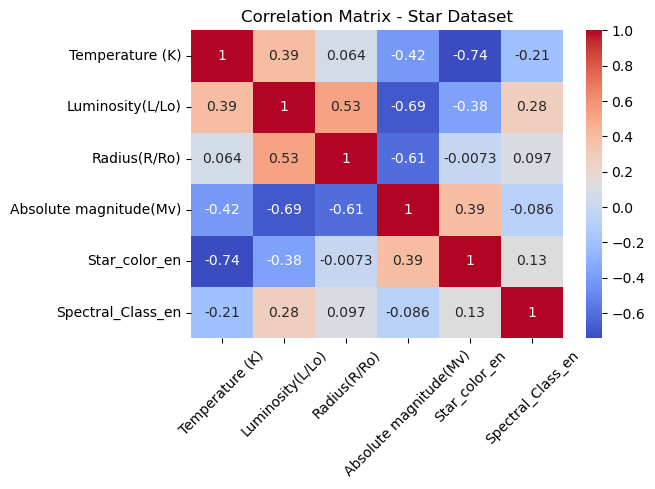

In [123]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Star Dataset')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.savefig('6.png')
# Show the plot
plt.show()


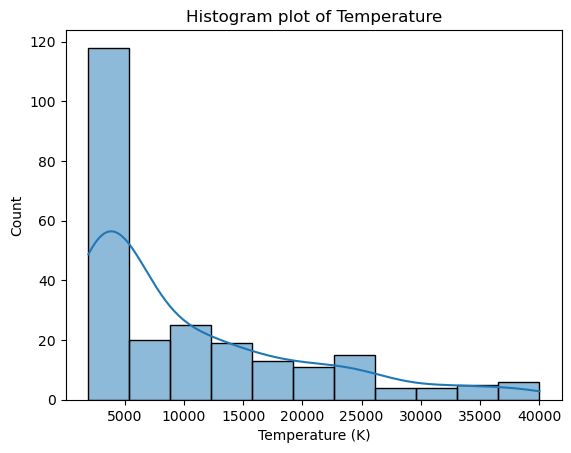

In [124]:
sns.histplot(xyz['Temperature (K)'],kde=True)
plt.title("Histogram plot of Temperature")
plt.savefig('7.png')


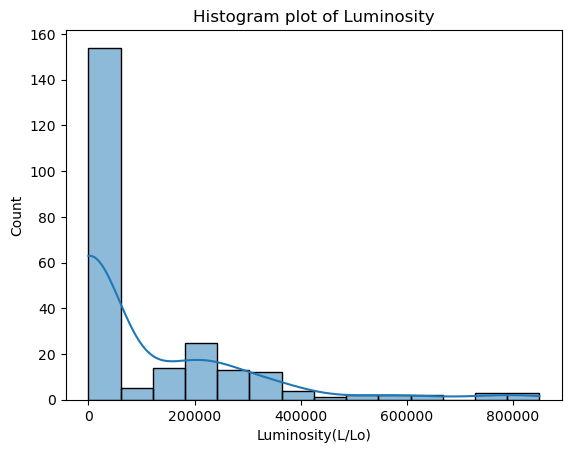

In [125]:
sns.histplot(xyz['Luminosity(L/Lo)'],kde=True)
plt.title("Histogram plot of Luminosity")
plt.savefig('8.png')

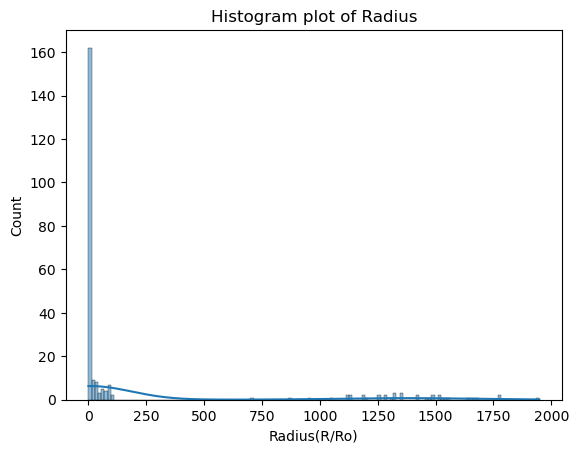

In [126]:
sns.histplot(xyz['Radius(R/Ro)'],kde=True)
plt.title("Histogram plot of Radius")
plt.savefig('9.png')

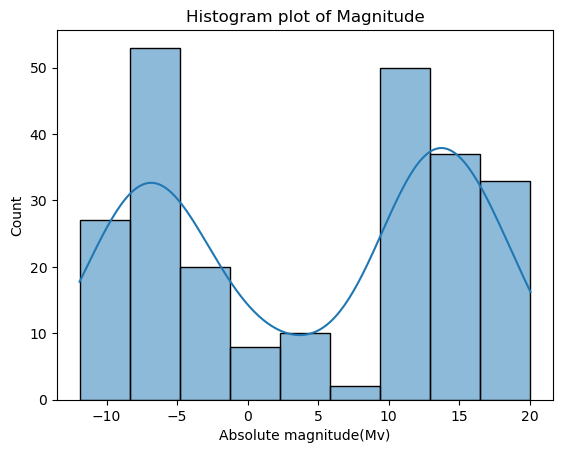

In [127]:
sns.histplot(xyz['Absolute magnitude(Mv)'],kde=True)
plt.title("Histogram plot of Magnitude")
plt.savefig('10.png')

In [128]:
X_shuffled, y_shuffled = shuffle(xyz, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size = 0.2, random_state = 0)


In [129]:
#X_train, X_test, Y_train, Y_test = train_test_split(xyz, y, test_size = 0.2, random_state= 100)

In [130]:
X_train

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star_color_en,Spectral_Class_en
46,3575,123000.000000,45.0000,-6.78,5,5
102,23000,127000.000000,36.0000,-5.76,0,6
67,2817,0.000980,0.0911,16.45,5,5
39,5587,0.819000,0.9900,5.03,8,2
188,2778,0.000849,0.1120,19.45,5,5
...,...,...,...,...,...,...
84,14100,0.000670,0.0089,12.17,1,1
63,2835,0.000340,0.0918,16.96,5,5
167,26373,198000.000000,39.0000,-5.83,0,6
38,5936,1.357000,1.1060,4.46,8,2


In [131]:
classifier = GaussianNB()

In [132]:
model = classifier.fit(X_train, y_train)

In [133]:
prediction = model.predict(X_test )

In [134]:
prediction

array([1, 5, 5, 1, 0, 1, 3, 1, 2, 4, 0, 4, 2, 0, 1, 3, 1, 4, 3, 0, 2, 2,
       4, 1, 5, 5, 1, 4, 5, 1, 2, 3, 2, 3, 0, 3, 4, 2, 4, 4, 2, 0, 2, 3,
       1, 5, 3, 2], dtype=int64)

In [135]:
y_test

77     1
111    5
55     5
75     1
2      0
74     1
94     3
130    1
81     2
107    4
5      0
169    4
208    2
181    0
71     1
32     3
131    1
100    4
151    3
9      0
141    2
89     2
42     4
61     0
172    5
235    5
189    0
41     4
114    5
184    0
209    2
156    3
23     2
155    3
64     0
158    3
44     4
80     2
101    4
161    4
200    2
66     0
149    2
152    3
132    1
230    5
215    3
86     2
Name: Star type, dtype: int64

In [136]:
probabilities = classifier.predict_proba(X_test)

In [137]:
# probabilities

In [138]:
cm = confusion_matrix( prediction, y_test)

In [139]:
cm

array([[ 6,  0,  0,  0,  0,  0],
       [ 3,  7,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

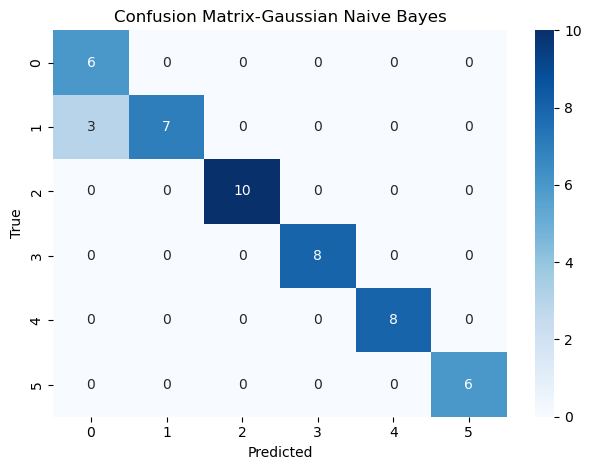

In [140]:
sns.heatmap(cm, annot=True, fmt='', cmap='Blues',xticklabels = ['0','1','2','3','4','5'],yticklabels = ['0','1','2','3','4','5'] )

# Add labels, title, and adjust layout
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-Gaussian Naive Bayes')
plt.tight_layout()
plt.savefig('11.png')

# Display the heatmap
plt.show()

In [141]:
report = classification_report(y_test, prediction)

In [142]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.70      1.00      0.82         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         6

    accuracy                           0.94        48
   macro avg       0.95      0.94      0.94        48
weighted avg       0.96      0.94      0.94        48



In [143]:
print("Naive Bayes score: ",model.score(X_test, y_test))

Naive Bayes score:  0.9375


In [144]:
X_shuffled.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star_color_en,Spectral_Class_en
24,16500,0.01300,0.014,11.89,1,1
6,2637,0.00073,0.127,17.22,5,5
93,4980,0.35700,1.130,4.78,7,4
109,33421,352000.00000,67.000,-5.79,0,6
104,11096,112000.00000,12.000,-5.91,0,6


Equal Width Binning (Catagorical)

In [145]:
#Equal width Binning

# Define continuous features to discretize
continuous_features = [ 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
X_shuffled2=X_shuffled.copy()
# Number of desired bins
num_bins = 10

# Apply equal width binning to each continuous feature
for feature in continuous_features:
    # bin_width = (X_shuffled2[feature].max() - X_shuffled2[feature].min()) / num_bins
    # bins = np.arange(X_shuffled2[feature].min(), X_shuffled2[feature].max() + bin_width, bin_width)
    # X_shuffled2[feature + '_bins'] = pd.cut(X_shuffled2[feature], bins=bins, labels=False)
    
    X_shuffled2[feature + '_bins'], bins = pd.cut(X_shuffled2[feature], bins=num_bins, labels=False, retbins= True)
    # print(f"Bins for {feature} feature \nBin width: {bin_width}\nBins are:")
    # print(bins)
    # print("")
    print("Bin Width: ", bins[1] - bins[0])
    print(bins)
    print("")

# Drop the original continuous features from the dataset
X_shuffled2.drop(continuous_features, axis=1, inplace=True)

Bin Width:  3844.161
[ 1900.939  5745.1    9551.2   13357.3   17163.4   20969.5   24775.6
 28581.7   32387.8   36193.9   40000.   ]

Bin Width:  85791.41999191999
[-8.49419920e+02  8.49420001e+04  1.69884000e+05  2.54826000e+05
  3.39768000e+05  4.24710000e+05  5.09652000e+05  5.94594000e+05
  6.79536000e+05  7.64478000e+05  8.49420000e+05]

Bin Width:  196.7976516
[-1.94009160e+00  1.94857560e+02  3.89706720e+02  5.84555880e+02
  7.79405040e+02  9.74254200e+02  1.16910336e+03  1.36395252e+03
  1.55880168e+03  1.75365084e+03  1.94850000e+03]

Bin Width:  3.2299799999999994
[-11.95198  -8.722    -5.524    -2.326     0.872     4.07      7.268
  10.466    13.664    16.862    20.06   ]



In [146]:
X_shuffled2

,Star_color_en,Spectral_Class_en,Temperature (K)_bins,Luminosity(L/Lo)_bins,Radius(R/Ro)_bins,Absolute magnitude(Mv)_bins
24,1,1,3,0,0,7
6,5,5,0,0,0,9
93,7,4,0,0,0,5
109,0,6,8,4,0,1
104,0,6,2,1,0,1
...,...,...,...,...,...,...
106,0,6,5,4,0,1
14,5,5,0,0,0,7
92,7,4,0,0,0,5
179,1,1,5,2,5,1


In [147]:
X_shuffled2.describe()

,Star_color_en,Spectral_Class_en,Temperature (K)_bins,Luminosity(L/Lo)_bins,Radius(R/Ro)_bins,Absolute magnitude(Mv)_bins
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,3.337500,3.758333,1.804167,1.079167,1.066667,4.616667
std,2.544715,2.090007,2.468035,1.918306,2.450287,3.332817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,5.000000,1.000000,0.000000,0.000000,5.500000
75%,5.000000,5.000000,3.000000,2.000000,0.000000,8.000000
max,8.000000,6.000000,9.000000,9.000000,9.000000,9.000000


In [148]:
X_shuffled2.isnull().any()

Star_color_en                  False
Spectral_Class_en              False
Temperature (K)_bins           False
Luminosity(L/Lo)_bins          False
Radius(R/Ro)_bins              False
Absolute magnitude(Mv)_bins    False
dtype: bool

In [149]:
y_shuffled.describe()

count    240.000000
mean       2.500000
std        1.711394
min        0.000000
25%        1.000000
50%        2.500000
75%        4.000000
max        5.000000
Name: Star type, dtype: float64

In [150]:
X_trainn, X_testn, y_trainn, y_testn = train_test_split(X_shuffled2, y_shuffled, test_size = 0.2, random_state = 0)

model1 = CategoricalNB()
model1.fit(X_trainn, y_trainn)

CategoricalNB()

In [151]:
prediction1 = model1.predict(X_testn)

In [152]:
prediction1

array([1, 5, 5, 1, 0, 1, 3, 1, 2, 4, 0, 4, 2, 0, 1, 3, 1, 4, 3, 1, 2, 2,
       4, 0, 5, 5, 1, 4, 5, 0, 2, 3, 2, 3, 0, 3, 1, 2, 4, 4, 2, 0, 2, 3,
       1, 5, 4, 2], dtype=int64)

In [153]:
y_testn

77     1
111    5
55     5
75     1
2      0
74     1
94     3
130    1
81     2
107    4
5      0
169    4
208    2
181    0
71     1
32     3
131    1
100    4
151    3
9      0
141    2
89     2
42     4
61     0
172    5
235    5
189    0
41     4
114    5
184    0
209    2
156    3
23     2
155    3
64     0
158    3
44     4
80     2
101    4
161    4
200    2
66     0
149    2
152    3
132    1
230    5
215    3
86     2
Name: Star type, dtype: int64

In [154]:
cm = confusion_matrix(prediction1, y_testn)
cm

array([[ 7,  0,  0,  0,  0,  0],
       [ 2,  7,  0,  0,  1,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  1,  7,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

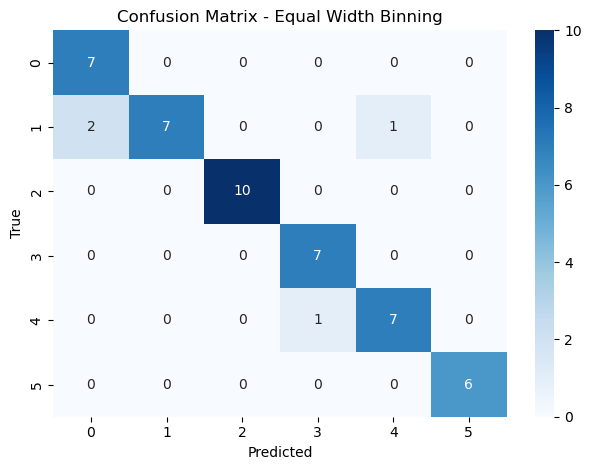

In [156]:
sns.heatmap(cm, annot=True, fmt='', cmap='Blues',xticklabels = ['0','1','2','3','4','5'],yticklabels = ['0','1','2','3','4','5'] )

# Add labels, title, and adjust layout
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Equal Width Binning')
plt.tight_layout()
plt.savefig('13.png')

# Display the heatmap
plt.show()

In [71]:
print("Categorical Naive Bayes score(Equal Width Binning): ",model1.score(X_testn, y_testn))

Categorical Naive Bayes score(Equal Width Binning):  0.9166666666666666


In [72]:
report1 = classification_report(y_testn, prediction1, digits=4)
print(report1)

              precision    recall  f1-score   support

           0     1.0000    0.7778    0.8750         9
           1     0.7000    1.0000    0.8235         7
           2     1.0000    1.0000    1.0000        10
           3     1.0000    0.8750    0.9333         8
           4     0.8750    0.8750    0.8750         8
           5     1.0000    1.0000    1.0000         6

    accuracy                         0.9167        48
   macro avg     0.9292    0.9213    0.9178        48
weighted avg     0.9354    0.9167    0.9189        48



Equal Frequency Binning (Catagorical)

In [157]:
#####Equal Frequency Binning

X_shuffled3=X_shuffled.copy()
# Define continuous features to discretize
continuous_features = [ 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Number of desired bins
num_bins = 10

# Create a new DataFrame to store the binned features
data_binned = X_shuffled3.copy()

# Apply equal frequency binning to each continuous feature
for feature in continuous_features:
    # Calculate the bin edges based on quantiles
    data_binned[feature], bins = pd.qcut(X_shuffled3[feature], q=num_bins, labels=False, retbins=True, duplicates='drop')
    print("Bin Width: ", bins[1] - bins[0])
    print(bins)
    print("")



Bin Width:  996.0
[ 1939.   2935.   3223.6  3477.7  3608.8  5776.   9269.  12985.8 18058.
 24667.  40000. ]

Bin Width:  0.0002580000000000001
[8.00000e-05 3.38000e-04 6.70000e-04 1.10000e-03 2.82000e-03 7.05000e-02
 1.10960e+03 1.46500e+05 2.25624e+05 3.33268e+05 8.49420e+05]

Bin Width:  0.0026
[8.4000e-03 1.1000e-02 9.1740e-02 1.2450e-01 3.0060e-01 7.6250e-01
 6.0032e+00 2.4300e+01 8.3000e+01 1.3159e+03 1.9485e+03]

Bin Width:  2.7200000000000006
[-11.92    -9.2     -6.94    -5.9065  -2.4      8.313   11.7     12.876
  14.358   16.962   20.06  ]



In [158]:
data_binned.isna().any()

Temperature (K)           False
Luminosity(L/Lo)          False
Radius(R/Ro)              False
Absolute magnitude(Mv)    False
Star_color_en             False
Spectral_Class_en         False
dtype: bool

In [159]:
data_binned

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star_color_en,Spectral_Class_en
24,7,4,1,6,1,1
6,0,2,3,9,5,5
93,4,5,5,4,7,4
109,9,9,7,3,0,6
104,6,6,6,2,0,6
...,...,...,...,...,...,...
106,8,9,7,3,0,6
14,0,1,3,6,5,5
92,4,5,5,4,7,4
179,8,8,8,1,1,1


In [160]:
X_shuffled3=data_binned.copy()

In [161]:
nX_train, nX_test, ny_train, ny_test = train_test_split(X_shuffled3, y_shuffled, test_size = 0.2, random_state = 0)

model2 = CategoricalNB()
model2.fit(nX_train, ny_train)

CategoricalNB()

In [162]:
prediction2 = model2.predict(nX_test)

In [163]:
prediction2

array([1, 5, 5, 1, 0, 1, 3, 1, 2, 4, 0, 4, 2, 0, 1, 3, 1, 4, 3, 0, 2, 2,
       5, 0, 5, 5, 0, 4, 5, 0, 2, 3, 2, 3, 0, 3, 4, 2, 4, 4, 2, 0, 2, 3,
       1, 5, 4, 2], dtype=int64)

In [164]:
ny_test

77     1
111    5
55     5
75     1
2      0
74     1
94     3
130    1
81     2
107    4
5      0
169    4
208    2
181    0
71     1
32     3
131    1
100    4
151    3
9      0
141    2
89     2
42     4
61     0
172    5
235    5
189    0
41     4
114    5
184    0
209    2
156    3
23     2
155    3
64     0
158    3
44     4
80     2
101    4
161    4
200    2
66     0
149    2
152    3
132    1
230    5
215    3
86     2
Name: Star type, dtype: int64

In [165]:
cm = confusion_matrix(prediction2, ny_test)
cm

array([[ 9,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  1,  7,  0],
       [ 0,  0,  0,  0,  1,  6]], dtype=int64)

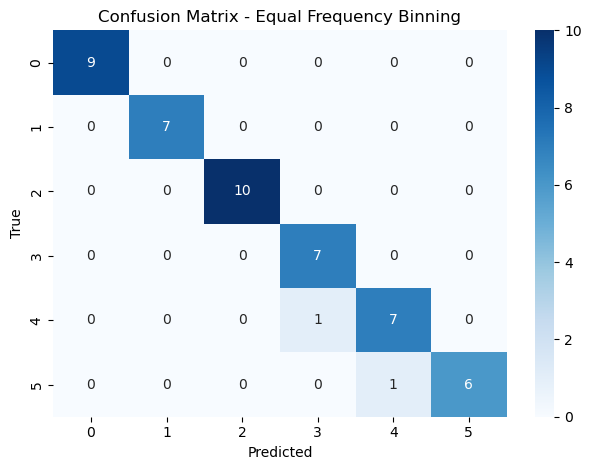

In [166]:
sns.heatmap(cm, annot=True, fmt='', cmap='Blues',xticklabels = ['0','1','2','3','4','5'],yticklabels = ['0','1','2','3','4','5'] )

# Add labels, title, and adjust layout
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Equal Frequency Binning')
plt.tight_layout()
plt.savefig('15.png')

# Display the heatmap
plt.show()

In [167]:
print("Categorical Naive Bayes score(Equal Frequency Binning): ",model2.score(nX_test, ny_test))

Categorical Naive Bayes score(Equal Frequency Binning):  0.9583333333333334


In [168]:
report2 = classification_report(ny_test, prediction2, digits=4)
print(report2)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     1.0000    1.0000    1.0000         7
           2     1.0000    1.0000    1.0000        10
           3     1.0000    0.8750    0.9333         8
           4     0.8750    0.8750    0.8750         8
           5     0.8571    1.0000    0.9231         6

    accuracy                         0.9583        48
   macro avg     0.9554    0.9583    0.9552        48
weighted avg     0.9613    0.9583    0.9584        48



HYBRID NAIVE BAYES

In [169]:
X_shuffled.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star_color_en,Spectral_Class_en
24,16500,0.01300,0.014,11.89,1,1
6,2637,0.00073,0.127,17.22,5,5
93,4980,0.35700,1.130,4.78,7,4
109,33421,352000.00000,67.000,-5.79,0,6
104,11096,112000.00000,12.000,-5.91,0,6


In [170]:
X = X_shuffled.copy()

In [171]:
X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star_color_en,Spectral_Class_en
24,16500,0.01300,0.014,11.890,1,1
6,2637,0.00073,0.127,17.220,5,5
93,4980,0.35700,1.130,4.780,7,4
109,33421,352000.00000,67.000,-5.790,0,6
104,11096,112000.00000,12.000,-5.910,0,6
...,...,...,...,...,...,...
106,24630,363000.00000,63.000,-5.830,0,6
14,2650,0.00060,0.140,11.782,5,5
92,4077,0.08500,0.795,6.228,7,4
179,24490,248490.00000,1134.500,-8.240,1,1


In [172]:
y = y_shuffled.copy()
y

24     2
6      0
93     3
109    4
104    4
      ..
106    4
14     1
92     3
179    5
102    4
Name: Star type, Length: 240, dtype: int64

In [173]:
X.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star_color_en', 'Spectral_Class_en'],
      dtype='object')

In [174]:
cata_features = ['Star_color_en', 'Spectral_Class_en']
cont_features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)','Absolute magnitude(Mv)']

In [175]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Gaussian Naive Bayes for continuous features
gnb = GaussianNB()
gnb.fit(X_train[cont_features], y_train)

# Train Categorical Naive Bayes for categorical features
cnb = CategoricalNB()
cnb.fit(X_train[cata_features], y_train)

# Predict probabilities for each class
gnb_probs = gnb.predict_proba(X_test[cont_features])
cnb_probs = cnb.predict_proba(X_test[cata_features])

# Combine predictions using weighted probabilities or other methods
weight_continuous = 4 / 6  # Since there are 7 continuous features
weight_categorical = 2 / 6  # Since there are 2 categorical features

hybrid_probs = weight_continuous * gnb_probs + weight_categorical * cnb_probs

# Make the final prediction by selecting the class with the highest probability
hybrid_predictions = np.argmax(hybrid_probs, axis=1)

# Evaluate the model
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the Hybrid Naive Bayes model
accuracy = accuracy_score(y_test, hybrid_predictions)
print("Hybrid Naive Bayes Accuracy: {:.4f}".format(accuracy))


Hybrid Naive Bayes Accuracy: 0.9375
